# Supervised Learning and K Nearest Neighbors Exercises

## Introduction

We will be using customer churn data from the telecom industry for this week's exercises. The data file is called 
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

In [25]:
from __future__ import print_function
import os

### Question 1
---
Begin by importing the data. Examine the columns and data. Notice that the data contains a state, area code, and phone number ('state', 'area-code', and 'phone_number'). Do you think these are good features to use when building a machine learning model? Why or why not?

In [26]:
import pandas as pd

# Import the data using the file path

data = pd.read_csv('Orange_Telecom_Churn_Data.csv')

print(data.head(1).T)

                                      0
state                                KS
account_length                      128
area_code                           415
phone_number                   382-4657
intl_plan                            no
voice_mail_plan                     yes
number_vmail_messages                25
total_day_minutes                 265.1
total_day_calls                     110
total_day_charge                  45.07
total_eve_minutes                 197.4
total_eve_calls                      99
total_eve_charge                  16.78
total_night_minutes               244.7
total_night_calls                    91
total_night_charge                11.01
total_intl_minutes                   10
total_intl_calls                      3
total_intl_charge                   2.7
number_customer_service_calls         1
churned                           False


expected output:
```
                                      0
state                                KS
account_length                      128
area_code                           415
phone_number                   382-4657
intl_plan                            no
voice_mail_plan                     yes
number_vmail_messages                25
total_day_minutes                 265.1
total_day_calls                     110
total_day_charge                  45.07
total_eve_minutes                 197.4
total_eve_calls                      99
total_eve_charge                  16.78
total_night_minutes               244.7
total_night_calls                    91
total_night_charge                11.01
total_intl_minutes                   10
total_intl_calls                      3
total_intl_charge                   2.7
number_customer_service_calls         1
churned                           False
```

### Question 1a
---
We will not be using `state`, `area_code`, and `phone_number`. Complete code to drop the colomns from the data.


In [34]:
### start code here
data.drop(['state', 'area_code', 'phone_number'], axis=1,inplace=True)
### end of code

data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

expected output:
```
Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')
```

### Question 2
---
Notice that some of the columns are categorical and some are floats/integers. These features will need to be numerically encoded using one of the methods from the lecture. Change the features to be numerical.



In [36]:
from sklearn.preprocessing import LabelBinarizer
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
# hint : use fit_transform()
lb = LabelBinarizer()

for c in ['intl_plan', 'voice_mail_plan', 'churned']:
    ### start of code
    data[c] = ...
    
    ### end of code

print(data[['intl_plan', 'voice_mail_plan', 'churned']].head())

   intl_plan  voice_mail_plan  churned
0          0                1        0
1          0                1        0
2          0                0        0
3          1                0        0
4          1                0        0


expected output:
```
   intl_plan  voice_mail_plan  churned
0          0                1        0
1          0                1        0
2          0                0        0
3          1                0        0
4          1                0        0
```



In [37]:
print(data[['account_length','total_day_calls', 'total_eve_minutes']].head())

   account_length  total_day_calls  total_eve_minutes
0             128              110              197.4
1             107              123              195.5
2             137              114              121.2
3              84               71               61.9
4              75              113              148.3



### Question 2a
---
Remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture. Scale all the columns using Min-Max Scaler (experiment with other scalers).


In [38]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

msc = ...
data = pd.DataFrame(msc.fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)

print(data[['account_length','total_day_calls', 'total_eve_minutes']].head())

   account_length  total_day_calls  total_eve_minutes
0        0.524793         0.666667           0.542755
1        0.438017         0.745455           0.537531
2        0.561983         0.690909           0.333242
3        0.342975         0.430303           0.170195
4        0.305785         0.684848           0.407754



expected output:
```
   account_length  total_day_calls  total_eve_minutes
0        0.524793         0.666667           0.542755
1        0.438017         0.745455           0.537531
2        0.561983         0.690909           0.333242
3        0.342975         0.430303           0.170195
4        0.305785         0.684848           0.407754
```

### Question 3
---
Separate the feature columns (everything except `churned`) from the label (`churned`). Create the two tables `X_data` and `y_data`.

In [39]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'churned']

# Split the data into two dataframes

### start code
X_data = data[x_cols]
y_data = data['churned']

## alternatively:
# X_data = data.copy()
# y_data = X_data.pop('churned')
### end code

print(X_data.shape)
print(y_data.shape)

(5000, 17)
(5000,)


expected result:
```
(5000, 17)
(5000,
```

### Question 3a
---
Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [40]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

knn = ...
knn = ...
y_pred = knn.predict(X_data)
### end code

knn.get_params()

AttributeError: 'ellipsis' object has no attribute 'predict'

expected output:
```
{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}
```
### Question 4
---
Ways to measure error haven't been discussed yet, but accuracy is an easy one to understand. It is simply the percent of labels that were correctly predicted (either true or false). Write a function to calculate accuracy using the actual and predicted labels.

In [41]:
# Function to calculate the % of values that were correctly predicted


def accuracy(actual, predict):
    return sum(actual == predict) / float(actual.shape[0])


print(accuracy(pd.Series([1,0,1,0]), pd.Series([0,0,1,0])))


0.75


expected output:
```
0.75
```

### Question 4a
---
Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [42]:

print(accuracy(y_data, y_pred))


NameError: name 'y_pred' is not defined

expected result:
```
0.9422
```

### Question 5
---
Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 


In [10]:


knn_dist = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_dist = knn_dist.fit(X_data, y_data)
y_pred = knn_dist.predict(X_data)


print(accuracy(y_data, y_pred))

1.0


expected output:
```
1.0
```
Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

### Question 5a
---
Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

In [11]:
# weights='uniform', p=1
### start code

### end code

print(accuracy(y_data, y_pred))

0.9456


expected output:
```
0.9456
```
### Question 6
---
Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2 -- just be consistent. Store the accuracy and the value of `k` used from each of these fits in a `DataFrame` with columns `accuracy` and `k`.


In [12]:

result = [ accuracy(y_data,KNeighborsClassifier(n_neighbors=(k+1)).fit(X_data,y_data).predict(X_data)) for k in range(20)]
result = pd.DataFrame(zip(range(1,21),result), columns=['k','accuracy'])


print(result.head(2))

   k  accuracy
0  1    1.0000
1  2    0.9292


expected output:
```
   k  accuracy
0  1    1.0000
1  2    0.9292
```

### Question 6a
---
Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is?

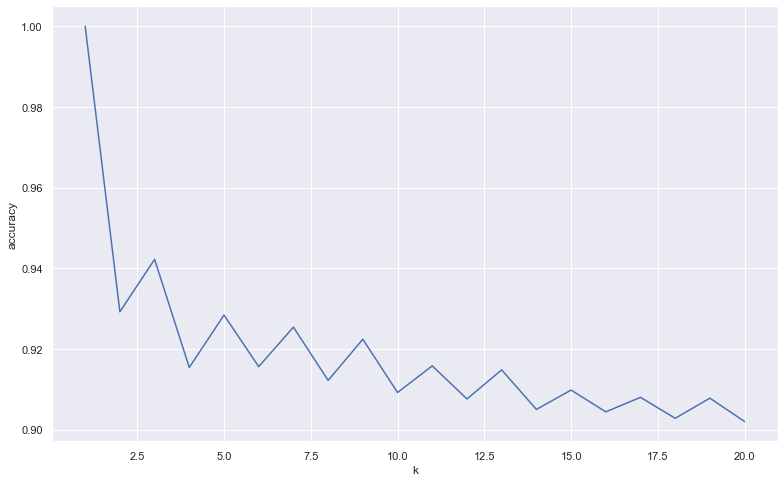

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

# set the size of the figure
sns.set(rc={'figure.figsize':(13,8)})

# plot a line showing the accuracy over k
### start code
sns.lineplot(data=result, y='accuracy', x='k')
### end code
plt.show()